In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
weather = pd.read_csv('weather_hourly_agg.csv', parse_dates=['DATE'])
traffic = pd.read_csv('traffic_hourly_agg.csv', parse_dates=['DATE'])

In [4]:
weather.columns = [c.lower() for c in weather.columns]

In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10527 entries, 0 to 10526
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   average_felt_temperature  10527 non-null  float64       
 1   average_road_temperature  10527 non-null  float64       
 2   minimum_felt_temperature  10527 non-null  float64       
 3   date                      10527 non-null  datetime64[ns]
 4   minimum_precipitation     10527 non-null  float64       
 5   maximum_humidity          10527 non-null  float64       
 6   maximum_felt_temperature  10527 non-null  float64       
 7   maximum_precipitation     10527 non-null  float64       
 8   maximum_temperature       10527 non-null  float64       
 9   average_humidity          10527 non-null  float64       
 10  average_wind              10527 non-null  float64       
 11  average_directionofwind   10527 non-null  float64       
 12  minimum_temperatur

In [6]:
traffic.columns = [c.lower() for c in traffic.columns]
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11523 entries, 0 to 11522
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   max_number_of_vehicles  11523 non-null  int64         
 1   minimum_speed           11523 non-null  int64         
 2   min_number_of_vehicles  11523 non-null  int64         
 3   average_speed           11523 non-null  float64       
 4   avg_number_of_vehicles  11523 non-null  float64       
 5   maximum_speed           11523 non-null  int64         
 6   date                    11523 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 630.3 KB


In [7]:
df = pd.merge(traffic, weather, how='inner', on='date').sort_values('date')
df

,max_number_of_vehicles,minimum_speed,min_number_of_vehicles,average_speed,avg_number_of_vehicles,maximum_speed,date,average_felt_temperature,average_road_temperature,minimum_felt_temperature,...,minimum_temperature,average_temperature,maximum_road_temperature,minimum_humidity,minimum_directionofwind,minimum_wind,maximum_directionofwind,minimum_road_temperature,maximum_wind,average_precipitation
0,298,6,11,56.59,58.72,193,2020-01-01 00:00:00,4.00,3.79,-4.22,...,-0.55,4.40,8.0,59.52,0.0,0.0,355.0,-13.2,6.41,1.18
1,272,6,11,57.41,53.68,188,2020-01-01 01:00:00,3.95,3.34,-3.75,...,-0.41,4.36,7.4,57.21,1.0,0.0,354.0,-37.1,6.00,0.23
2,223,3,11,59.70,44.72,197,2020-01-01 02:00:00,4.11,4.08,-1.24,...,1.15,4.38,7.2,52.10,0.0,0.0,355.0,1.8,5.39,0.93
3,166,6,11,61.05,37.51,191,2020-01-01 03:00:00,4.26,4.23,0.39,...,2.12,4.36,6.6,54.88,0.0,0.0,355.0,2.7,5.01,0.62
4,113,6,11,62.44,32.87,207,2020-01-01 04:00:00,4.92,4.56,0.58,...,2.34,4.65,6.7,56.46,0.0,0.0,355.0,2.9,3.97,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10318,780,1,11,49.27,107.00,202,2021-04-28 13:00:00,17.57,22.08,10.96,...,12.08,17.01,40.3,0.88,1.0,0.0,355.0,-1.9,7.65,0.88
10319,637,1,11,48.46,88.08,195,2021-04-28 14:00:00,16.78,20.58,11.15,...,11.17,16.28,36.3,0.88,0.0,0.0,356.0,-1.9,7.49,2.57
10320,552,1,11,48.28,83.62,200,2021-04-28 15:00:00,15.42,18.33,9.38,...,10.36,15.11,31.6,0.88,0.0,0.0,355.0,-1.9,8.05,2.48
10321,522,1,11,47.41,74.22,197,2021-04-28 16:00:00,14.49,16.71,7.96,...,9.69,14.27,27.2,0.88,0.0,0.0,355.0,-1.9,10.37,2.49


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
max_number_of_vehicles,10323.0,564.932481,318.729129,11.00,270.000,533.00,857.000,1351.00
minimum_speed,10323.0,3.312990,2.257879,0.00,1.000,3.00,6.000,38.00
min_number_of_vehicles,10323.0,11.000000,0.000000,11.00,11.000,11.00,11.000,11.00
average_speed,10323.0,57.749718,5.323657,32.22,53.590,57.06,60.815,77.42
avg_number_of_vehicles,10323.0,82.577765,34.298380,11.00,50.320,85.43,111.710,167.80
maximum_speed,10323.0,195.445607,15.679680,84.00,186.000,195.00,204.000,255.00
average_felt_temperature,10323.0,14.083199,8.268232,-5.48,7.380,12.94,21.410,33.79
average_road_temperature,10323.0,17.588540,11.100819,-26.18,9.100,14.61,24.890,53.45
minimum_felt_temperature,10323.0,8.992021,8.518939,-13.47,2.450,7.93,16.225,27.65
minimum_precipitation,10323.0,0.000068,0.004017,0.00,0.000,0.00,0.000,0.34


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='date'>

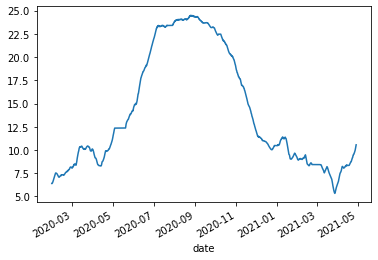

In [10]:
#Observe monthly trend
df.set_index('date')['average_temperature'].rolling(24*30).mean().plot()

<AxesSubplot:xlabel='date'>

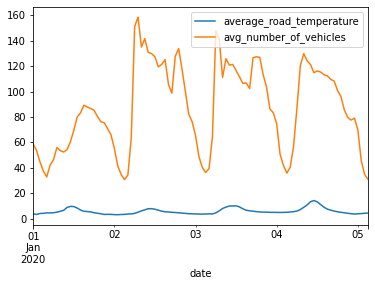

In [11]:
df.set_index('date')[:100][['average_road_temperature', 'avg_number_of_vehicles']].plot()

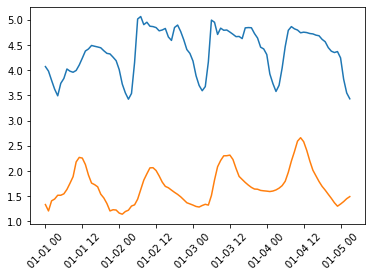

In [12]:
plt.plot(np.log(df.set_index('date')[:100]['avg_number_of_vehicles']))
plt.plot(np.log(df.set_index('date')[:100]['average_road_temperature']))
plt.xticks(rotation=45)
plt.show()

In [13]:
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour

<AxesSubplot:xlabel='hour'>

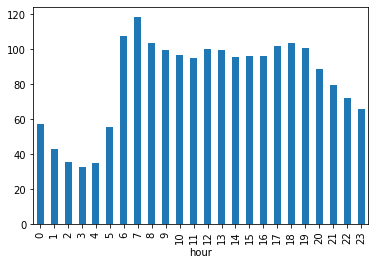

In [14]:
df.groupby('hour').avg_number_of_vehicles.mean().plot(kind='bar')

<AxesSubplot:xlabel='dayofweek'>

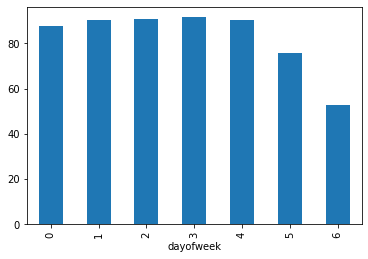

In [15]:
df.groupby('dayofweek').avg_number_of_vehicles.mean().plot(kind='bar')

In [27]:
for wkday in df.groupby(['dayofweek','hour']).avg_number_of_vehicles.mean():
    wkday.plot()
plt.show();

AttributeError: 'float' object has no attribute 'plot'

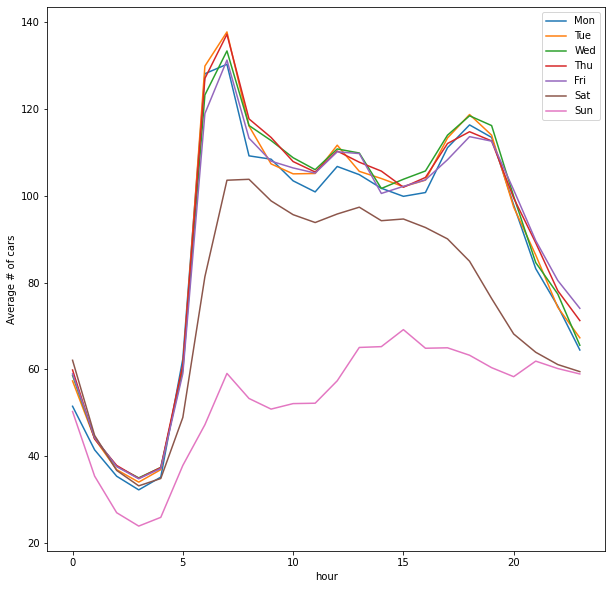

In [37]:
plt.figure(figsize=(10,10))
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i, dayname in enumerate(days):
    df.groupby(['dayofweek','hour']).avg_number_of_vehicles.mean()[i].plot(label=dayname)
plt.ylabel('Average # of cars')
plt.legend()
plt.show();

In [30]:
type(df.groupby(['dayofweek','hour']).avg_number_of_vehicles.mean()[0])

pandas.core.series.Series

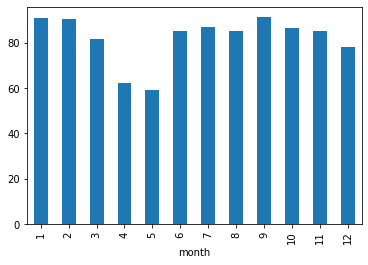

In [15]:
df.query('date < 2021').groupby('month').avg_number_of_vehicles.mean().plot(kind='bar')
plt.show()

### Time Series Prediction

In [16]:
df.columns

Index(['max_number_of_vehicles', 'minimum_speed', 'min_number_of_vehicles',
       'average_speed', 'avg_number_of_vehicles', 'maximum_speed', 'date',
       'average_felt_temperature', 'average_road_temperature',
       'minimum_felt_temperature', 'minimum_precipitation', 'maximum_humidity',
       'maximum_felt_temperature', 'maximum_precipitation',
       'maximum_temperature', 'average_humidity', 'average_wind',
       'average_directionofwind', 'minimum_temperature', 'average_temperature',
       'maximum_road_temperature', 'minimum_humidity',
       'minimum_directionofwind', 'minimum_wind', 'maximum_directionofwind',
       'minimum_road_temperature', 'maximum_wind', 'average_precipitation',
       'month', 'dayofweek', 'hour'],
      dtype='object')

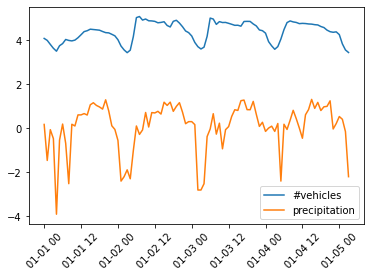

In [21]:
plt.plot(np.log(df.set_index('date')[:100]['avg_number_of_vehicles']))
plt.plot(np.log(df.set_index('date')[:100]['average_precipitation']))
plt.xticks(rotation=45)
plt.legend(['#vehicles','precipitation'])
plt.show()

In [78]:
from scipy.stats import pearsonr, spearmanr
num_vehicles = df.set_index('date')['avg_number_of_vehicles']
precip = df.set_index('date')['average_precipitation']
pearsonr(num_vehicles, precip)

(0.04110764602676027, 2.9423111873128992e-05)

In [79]:
spearmanr(num_vehicles, precip)

SpearmanrResult(correlation=0.2097336456766224, pvalue=5.663722449665168e-103)

# ARIMA MODEL

*https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
*p --> Order of AR (autoregressive term) -number of lags to be used as predictors for regression
*q --> Order of MA (moving average term) -
*d --> Order of Differencing (to make the series stationary)

### Check if Stationary

* Mean and variance seems to change over time

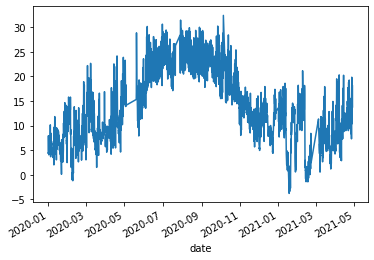

In [50]:
temperature = df.set_index('date')['average_temperature']
temperature.plot();

In [51]:
#Test if stationary (Dicky Fuller test) - h0: Time series data is not stationary
from statsmodels.tsa.stattools import adfuller
results = adfuller(temperature)

In [52]:
print("h0: Time series data is not stationary")
print(f"Test Statistic: {results[0]}\nP-Value: {results[1]}\nCritical Test stats for intervals: {results[4]}\n")

h0: Time series data is not stationary
Test Statistic: -3.8717903416163604
P-Value: 0.0022525473716549114
Critical Test stats for intervals: {'1%': -3.430986091914247, '5%': -2.8618211156400086, '10%': -2.566919632711204}



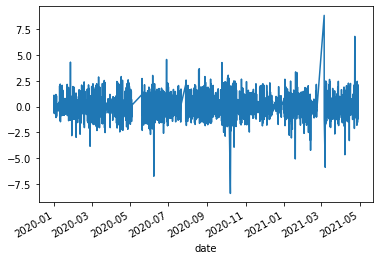

In [53]:
diff1 = temperature.diff()
diff1.plot();

In [46]:
results = adfuller(diff1.dropna())
print("h0: Time series data is not stationary")
print(f"Test Statistic: {results[0]}\nP-Value: {results[1]}\nCritical Test stats for intervals: {results[4]}\n")

h0: Time series data is not stationary
Test Statistic: -18.854728727537132
P-Value: 0.0
Critical Test stats for intervals: {'1%': -3.430986153794312, '5%': -2.861821142984471, '10%': -2.5669196472666678}



In [54]:
from pmdarima.arima.utils import ndiffs
ndiffs(temperature, test='adf')

1

In [72]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(diff1.dropna());

ModuleNotFoundError: No module named 'statsmodels.tsa.graphics'

## DECOMPOSITION

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [108]:
ts = df.set_index('date')
ts.sort_index(inplace=True)

In [116]:
results = seasonal_decompose(ts['average_temperature'], period=1)